Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

In [1]:
# Install gdown
!pip install -qq --upgrade --no-cache-dir gdown

In [2]:
# Donwload dataset from link
!gdown https://drive.google.com/u/0/uc?id=1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs

Downloading...
From: https://drive.google.com/u/0/uc?id=1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs
To: /content/CNN_assignment.zip
100% 824M/824M [00:09<00:00, 88.1MB/s]


In [3]:
# Unzip the dataset folder

!unzip -qq CNN_assignment.zip

In [ ]:
# How many images in each folder?
import os

# Walk through dataset folder
for dirpath, dirnames, filenames in os.walk("Skin cancer ISIC The International Skin Imaging Collaboration"):
    if len(filenames)!=0:
        print(f"There are {len(filenames)} images in '{dirpath}'.")

There are 16 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis'.
There are 16 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis'.
There are 16 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Test/squamous cell carcinoma'.
There are 3 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Test/seborrheic keratosis'.
There are 16 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Test/dermatofibroma'.
There are 3 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Test/vascular lesion'.
There are 16 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Test/nevus'.
There are 16 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma'.
There are 16 images in 'Skin cancer ISIC The International Skin Imaging Collaboration/Test/basal cell carcinoma'.
There ar

In [ ]:
from glob import glob
data_dir = "./Skin cancer ISIC The International Skin Imaging Collaboration/"
traing_img_cnt = len(glob(data_dir + 'Train/*/*.jpg'))
testing_img_cnt = len(glob(data_dir + 'Test/*/*.jpg'))

print(f'Total Numbers of Training Images are :{traing_img_cnt}')
print(f'Total Numbers of Testing Images are :{testing_img_cnt}')
print(f'Total Images in Dataset are:{traing_img_cnt+testing_img_cnt}')

Total Numbers of Training Images are :2239
Total Numbers of Testing Images are :118
Total Images in Dataset are:2357


🔑**Insites:**
- From above its clear that training data has class imbalance
- In training data `pigmented benign keratosis` class has heighest number of images and `seborrheic keratosis` has least
- Testing data has 16 images per class except `seborrheic keratosis` and `vascular lesion`
- Total Training images are 2239, Tesing images are 118 and Total Images in dataset 2357 from 9 different classes

### Importing all the important libraries

In [4]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
!nvidia-smi

Wed Mar  8 02:48:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    21W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               batch_size=batch_size,
                                                               image_size=(img_height, img_width),
                                                               seed=123,
                                                               validation_split = 0.2,
                                                               subset = 'training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                             batch_size=batch_size,
                                                             image_size=(img_height, img_width),
                                                             seed=123,
                                                             validation_split = 0.2,
                                                             subset = 'validation')

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

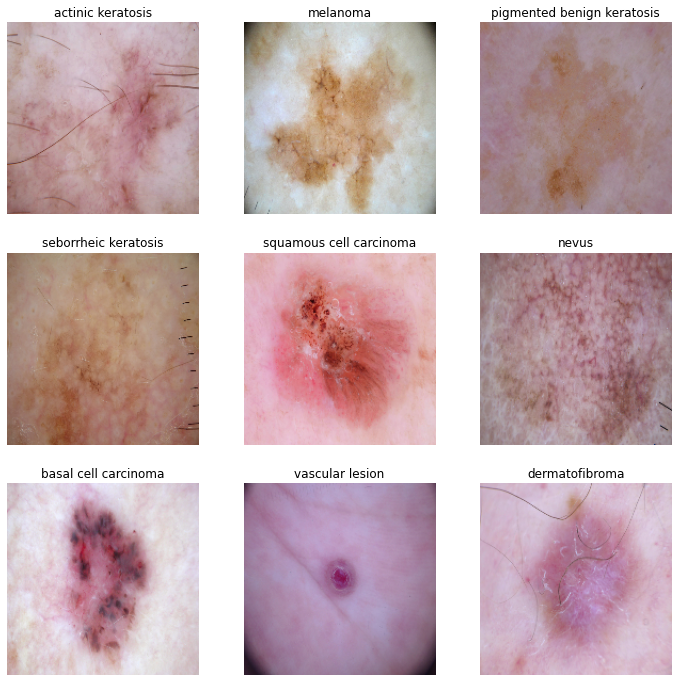

In [49]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(12, 12))
names=[]
j=0
for images, labels in train_ds.take(2):
    for i in range(32):
        if labels[i] not in names:
            ax = plt.subplot(3, 3, j + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
            names.append(labels[i])
            j=j+1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here

num_classes = 9

model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(128, 3, padding='same', activation='relu'),
                    layers.Conv2D(128, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
                  ])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 64)        36928     
                                                        

### Train the model

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
56/56 [==============================] - 33s 136ms/step - loss: 2.0226 - accuracy: 0.2182 - val_loss: 1.9591 - val_accuracy: 0.2886
Epoch 2/20
56/56 [==============================] - 5s 81ms/step - loss: 1.8879 - accuracy: 0.2974 - val_loss: 1.8083 - val_accuracy: 0.3065
Epoch 3/20
56/56 [==============================] - 4s 79ms/step - loss: 1.7668 - accuracy: 0.3398 - val_loss: 1.7779 - val_accuracy: 0.3400
Epoch 4/20
56/56 [==============================] - 4s 80ms/step - loss: 1.6906 - accuracy: 0.3951 - val_loss: 1.6239 - val_accuracy: 0.4094
Epoch 5/20
56/56 [==============================] - 5s 81ms/step - loss: 1.6414 - accuracy: 0.4046 - val_loss: 1.5658 - val_accuracy: 0.4698
Epoch 6/20
56/56 [==============================] - 4s 80ms/step - loss: 1.5477 - accuracy: 0.4515 - val_loss: 1.4885 - val_accuracy: 0.4720
Epoch 7/20
56/56 [==============================] - 5s 81ms/step - loss: 1.4631 - accuracy: 0.4682 - val_loss: 1.4326 - val_accuracy: 0.5213
Epoch 8/20


### Visualizing training results

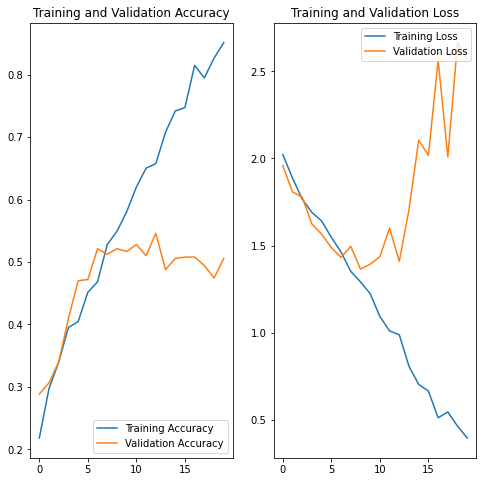

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### **🔑 Insites:**<br>
- As the training accuracy increases linearly over time, where as the validation accuracy stall at 50% accuracy in training process.
- As the training loss dereases with epochs the validation loss increases.
- The plots show that training accuracy and validation accuracy are off by large margins, and the model has achieved around 50% accuracy on the validation set.
- The difference in accuracy between training and validation accuracy is noticeable which is a sign of overfitting.

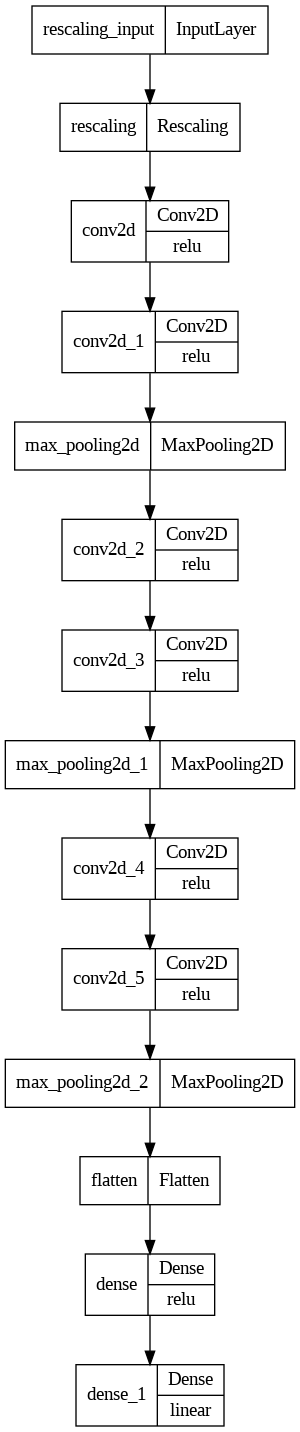

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    to_file='model_1.png',
    show_layer_activations=True
)

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomContrast(0.2),
    layers.experimental.preprocessing.RandomTranslation(0.1,0.1)
  ]
)

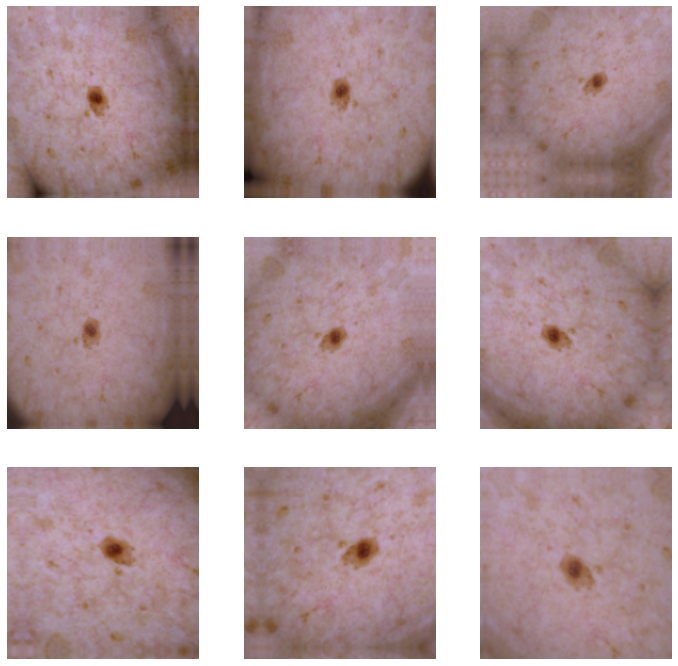

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(12, 12))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off");

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

num_classes = 9

model = Sequential([
                    data_augmentation,
                    layers.experimental.preprocessing.Rescaling(1./255),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.25),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.25),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
                  ])

### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 61s 632ms/step - loss: 2.3689 - accuracy: 0.1925 - val_loss: 2.0136 - val_accuracy: 0.2081
Epoch 2/20
56/56 [==============================] - 34s 569ms/step - loss: 2.0224 - accuracy: 0.2037 - val_loss: 2.0307 - val_accuracy: 0.2103
Epoch 3/20
56/56 [==============================] - 35s 591ms/step - loss: 2.0031 - accuracy: 0.2126 - val_loss: 1.9332 - val_accuracy: 0.2886
Epoch 4/20
56/56 [==============================] - 36s 612ms/step - loss: 1.9243 - accuracy: 0.2852 - val_loss: 1.8221 - val_accuracy: 0.3490
Epoch 5/20
56/56 [==============================] - 38s 651ms/step - loss: 1.8305 - accuracy: 0.3209 - val_loss: 1.8067 - val_accuracy: 0.3647
Epoch 6/20
56/56 [==============================] - 38s 662ms/step - loss: 1.8444 - accuracy: 0.3237 - val_loss: 1.6645 - val_accuracy: 0.4519
Epoch 7/20
56/56 [==============================] - 38s 627ms/step - loss: 1.6799 - accuracy: 0.3906 - val_loss: 1.6767 - val_accuracy: 0.4094

### Visualizing the results

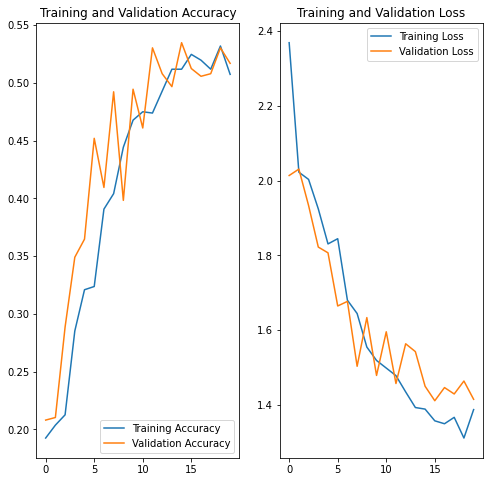

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**🔑Insites:**:<br>
- As the training accuracy increases linearly over time, where as the validation accuracy increases and stall at 55% accuracy in training process.
- As the training loss decreases with epochs the validation loss decreases and stalls.
- The plots show that gap between training accuracy and validation accuracy have decreased from previous model, and it has achieved around 55% accuracy on the validation set.
- The difference in accuracy between training and validation accuracy is very lesser, henece this is stable model
- From trend of loss cruve if we keep model running for more epoch we might achive better model accuracy

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

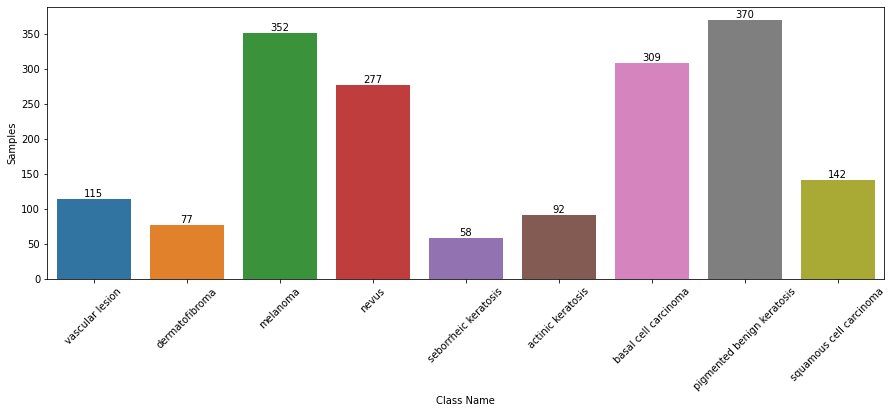

In [ ]:
## Your code goes here.

class_distr={}

#Iritate through all training dataset batches
for image_batch, labels_batch in train_ds:
  # take the count of images in each class
    for i in range(image_batch.shape[0]):
      if class_names[labels_batch[i]] in class_distr:
        class_distr[class_names[labels_batch[i]]]+=1
      else:
        class_distr[class_names[labels_batch[i]]]=1
# Display the distribution
class_distr


df_sample_distr = pd.DataFrame({"Class Name":list(class_distr.keys()), "Samples":list(class_distr.values())})
df_sample_distr.sort_values('Samples',ascending=False)


import seaborn as sns
plt.figure(figsize=(15, 5))
ax=sns.barplot(data=df_sample_distr,x='Class Name',y='Samples')
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 45) 
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?

**🔑Insites:**
- `seborrheic keratosis` class has the least number of samples with just 58 images
- `pigmented benign keratosis`, `melanoma`, `basal cell carcinoma`, `nevus` dominate the data in terms proportionate number of samples
- `pigmented benign keratosis` has heighest numbers of images in training data which is 370 images

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df.head()

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
1,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
2,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
3,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
4,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis


In [ ]:
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip -qq install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3885EE7D90>: 100%|██████████| 500/500 [00:19<00:00, 25.77 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3920127940>: 100%|██████████| 500/500 [00:18<00:00, 26.88 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3885EE7D90>: 100%|██████████| 500/500 [00:19<00:00, 25.84 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F38836B3DC0>: 100%|██████████| 500/500 [01:41<00:00,  4.93 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F38900E2970>: 100%|██████████| 500/500 [01:25<00:00,  5.86 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F392A0DC910>: 100%|██████████| 500/500 [00:17<00:00, 28.14 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F393C235A90>: 100%|██████████| 500/500 [00:46<00:00, 10.76 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3920147BB0>: 100%|██████████| 500/500 [00:17<00:00, 27.79 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F386A327A60>: 100%|██████████| 500/500 [00:20<00:00, 24.73 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[:5]

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026060.jpg_b0fd8c99-9edb-45fa-a18d-a2d38f74f79e.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025099.jpg_93e93599-0eb1-4753-94f1-3d9001a23b5f.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025703.jpg_41e2c745-bdf1-4d67-8246-05c7a2fca013.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027367.jpg_05c7f5ce-2f92-4436-a7e9-41e26ce7ceba.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0028233.jpg_f2daaaea-8572-493a-89bc-2651edb3f71f.jpg']

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:5]

['pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis']

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)
new_df.head()

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
1,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
2,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
3,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
4,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis


In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

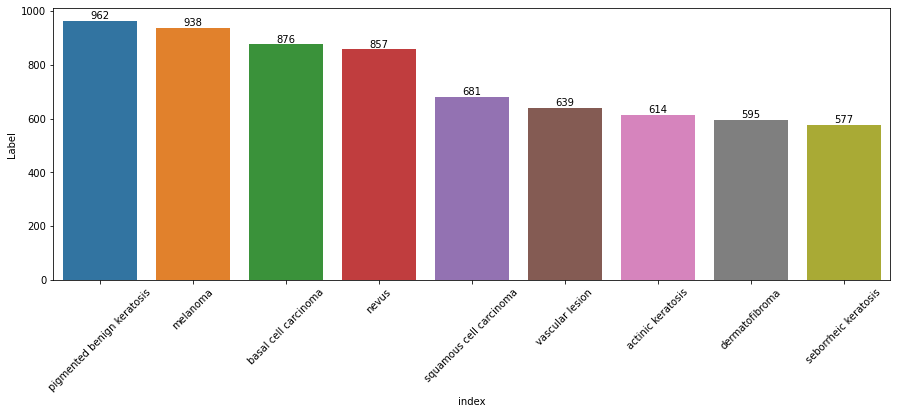

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 5))
ax=sns.barplot(data=pd.DataFrame(new_df['Label'].value_counts()).reset_index(),x='index',y='Label')
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation = 45) 
plt.show()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train="Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = 9

model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(128, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.5),
                    layers.Flatten(),
                    layers.Dense(256, activation='relu'),
                    layers.Dropout(0.25),
                    layers.Dense(num_classes)
                  ])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## Your code goes here
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 13s 60ms/step - loss: 1.8691 - accuracy: 0.2871 - val_loss: 1.5124 - val_accuracy: 0.4462
Epoch 2/30
169/169 [==============================] - 10s 57ms/step - loss: 1.4315 - accuracy: 0.4598 - val_loss: 1.2485 - val_accuracy: 0.5189
Epoch 3/30
169/169 [==============================] - 10s 57ms/step - loss: 1.2829 - accuracy: 0.5176 - val_loss: 1.1037 - val_accuracy: 0.6013
Epoch 4/30
169/169 [==============================] - 10s 59ms/step - loss: 1.1276 - accuracy: 0.5721 - val_loss: 1.0241 - val_accuracy: 0.6132
Epoch 5/30
169/169 [==============================] - 10s 56ms/step - loss: 0.9785 - accuracy: 0.6397 - val_loss: 0.8982 - val_accuracy: 0.6771
Epoch 6/30
169/169 [==============================] - 9s 56ms/step - loss: 0.8286 - accuracy: 0.6986 - val_loss: 0.7919 - val_accuracy: 0.7068
Epoch 7/30
169/169 [==============================] - 10s 61ms/step - loss: 0.7405 - accuracy: 0.7253 - val_loss: 0.8109 - val_accuracy: 

#### **Todo:**  Visualize the model results

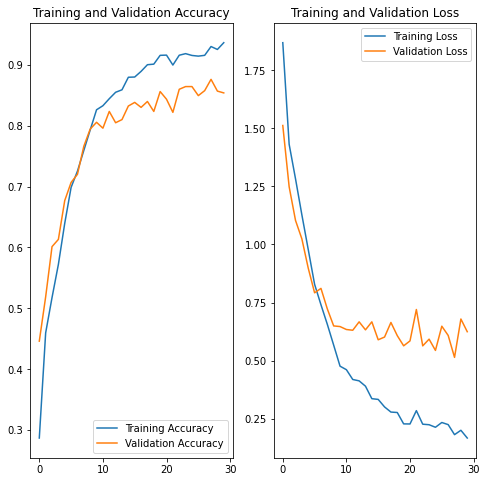

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

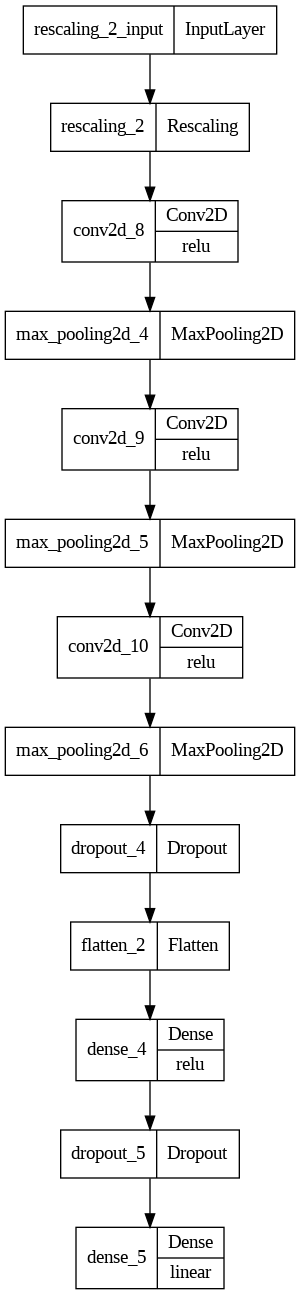

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    to_file='model_3.png',
    show_layer_activations=True
)

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

**🔑Insites:**<br>

- As the training accuracy increases linearly over time, where as the validation accuracy increases in training process.
- As the training loss decreases with epochs the validation loss also decreases.
- The plots show that gap between training accuracy and validation accuracy have decreased significantly from previous model, and it has achieved around 88% accuracy on the validation set.
- The difference in accuracy between training and validation accuracy is very less
- Class rebalancing not only got rid of overfitting it also improved the accuracy from 55% to 88%.